---

# Case study of [HD 332231](https://ui.adsabs.harvard.edu/abs/2021arXiv211114968K/abstract)
Here we will be using <s>tracit</s> to study HD 332231

---

First we link to the path, where <s>tracit</s> is located

In [1]:
import sys
sys.path.append('/home/emil/Desktop/PhD/tracit')

Then we import <s>tracit</s>.
The two run commands are just to setup text rendering in the plots to LaTeX.

In [2]:
import tracit
nproc = 1

tracit.run_bus(nproc)
tracit.run_exp(nproc)

We want to create two .csv files: 
1. In this we specify the values for the parameters, priors, boundaries, etc.
2. In this we give the filenames for our data, and we can also specify the de-trending/noise model

We'll cal the first one 'par.csv' and the second one 'dat.csv'. 

In [3]:
pfile = 'par.csv'
dfile = 'dat.csv'

create_file = 0 #set to 0 to make sure we don't overwrite the files once they are created
if create_file:
    tracit.params_temp(pfile,n_spec=1,n_phot=1,n_planets=1)
    tracit.data_temp(dfile,n_spec=1,n_phot=1)

Assuming we now have filled out the two files, we can now read them in as dictionaries.

In [4]:
par = tracit.params_structure(pfile)
dat = tracit.data_structure(dfile)

Before we run our MCMC, it's a good idea to check that our parameters/data look reasonable. We therefore plot the light curve and the radial velocity curve.

In [5]:
pre_inspect = 0
if pre_inspect:
    tracit.plot_lightcurve(par,dat)
    tracit.plot_orbit(par,dat)

There's obviously room for some improvement here, so let's hope our MCMC can fix that. We can specify the number of CPUs we have at our disposal through *nproc*. We can also generate some instructive plots that allow us to inspect how the MCMC was performing; we can inspect how the walkers were walking using the *chains* argument, and we can see the 2D correlation plot through the *corner* argument.

We will do 10,000 draws with 20 walkers.

Fitting Rp_Rs_b.
Fitting lam_b.
Fitting LC1_q_sum.
Fitting 3 parameters in total.

Maximum number of draws is 10000.
Starting from 0 draws.
10000 draws remaining.




 18%|█▊        | 1800/10000 [09:05<41:26,  3.30it/s]


MCMC converged after 1800 iterations.
Burn-in applied: 900
Chains are thinned by: 4


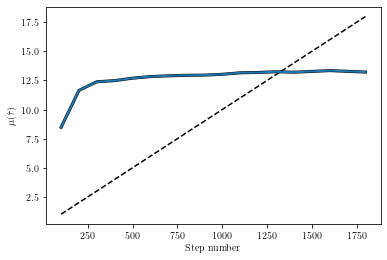

In [6]:
mc = 1
if mc:
    ndraws = 10000
    nwalkers = 20
    
    rdf = tracit.mcmc(pfile,dfile,ndraws,nwalkers,nproc=nproc,corner=True,chains=True)

Even though we set the number of draws to 10,000, the routine stopped earlier because the MCMC had converged.
After this we might want to take a look at the resulting parameters, which are both saved to 'results.csv', but also returned in the dataframe *rdf*.

If we have results from an earlier run, we can also just load the results into a dataframe.

In [7]:
saved_results = 0 # set to 1 if you want to read in the results instead
if saved_results:
    import pandas as pd
    rdf = pd.read_csv('results.csv')

In [11]:
print(rdf)

   Parameter                         Rp_Rs_b                        lam_b  \
0      Label  $(R_\mathrm{p}/R_\star)\rm _b$  $\lambda \rm _b \ (^\circ)$   
1     Median                         0.06849                          -24   
2      Lower                         0.00022                            6   
3      Upper                         0.00016                            6   
4   Best-fit                         0.06849                          -25   
5       Mode                         0.06851                          -26   
6      Prior                             uni                          uni   
7   Location                            0.04                        -90.0   
8      Width                            0.05                         10.0   
9      Lower                             0.0                       -180.0   
10     Upper                             0.1                        180.0   
11      Rhat                        1.012232                     1.009638   

Finally, we probably want to see that things have actually improved. Therefore, we plot the data again, but this time we update our parameter dictionary with our new parameters before passing it to the plotting routines.

   Parameter                         Rp_Rs_b                        lam_b  \
0      Label  $(R_\mathrm{p}/R_\star)\rm _b$  $\lambda \rm _b \ (^\circ)$   
1     Median                         0.06849                          -24   
2      Lower                         0.00022                            6   
3      Upper                         0.00016                            6   
4   Best-fit                         0.06849                          -25   
5       Mode                         0.06851                          -26   
6      Prior                             uni                          uni   
7   Location                            0.04                        -90.0   
8      Width                            0.05                         10.0   
9      Lower                             0.0                       -180.0   
10     Upper                             0.1                        180.0   
11      Rhat                        1.012232                     1.009638   

/home/emil/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


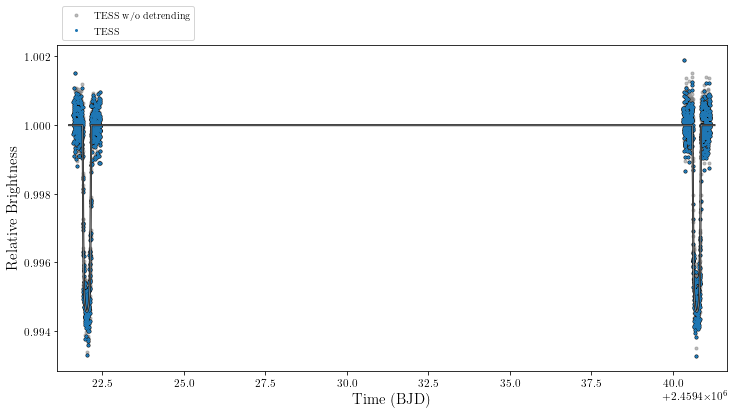

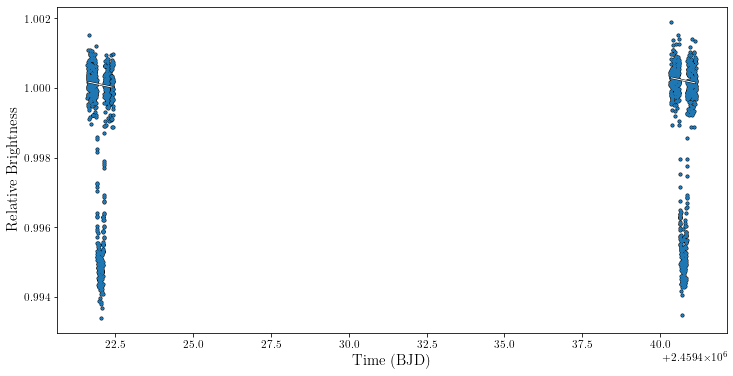

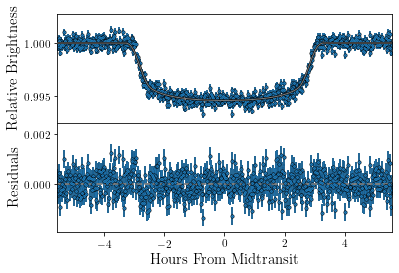

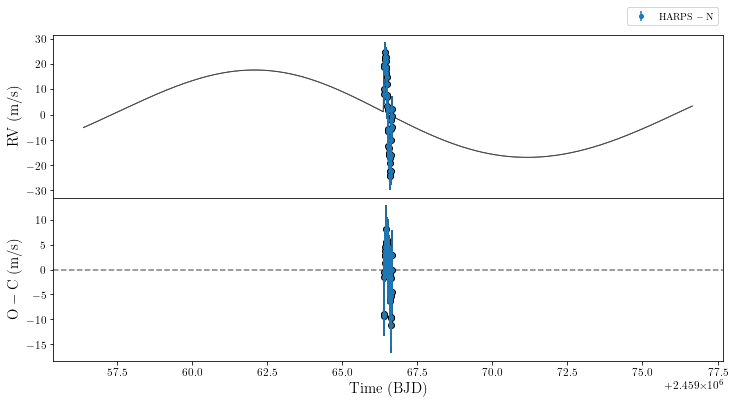

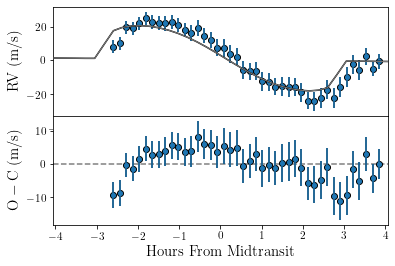

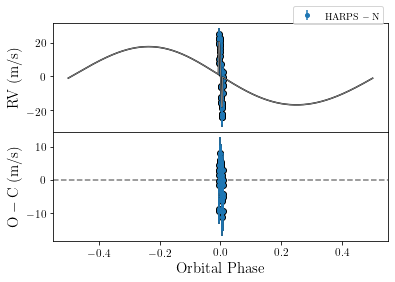

In [10]:
post_inspect = 1
if post_inspect:
    par = tracit.params_structure(pfile,updated_pars=rdf)
    tracit.plot_lightcurve(par,dat)
    tracit.plot_orbit(par,dat,updated_pars=rdf)

Arguably this looks much better.